In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score
import cv2
from imblearn.over_sampling import RandomOverSampler, SMOTE
import tensorflow as tf
from keras import backend as K
from keras.callbacks import LearningRateScheduler

# DADOS

In [3]:
xt = np.load("Dados/Xtrain_Classification2.npy") 
yt = np.load("Dados/ytrain_Classification2.npy")
xScaled =  (xt).astype('float32')/255.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.2, shuffle=True, random_state=10, stratify=yt)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=10,stratify=y_train)

# Rodar imagens

In [5]:
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)
addx = np.array([])
addy = np.array([]) 
for idx, i in enumerate(y_train):
        for l in range(3):
            if l == 0:
                if not np.any(addx):
                    addx = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addy = np.append(addy,i)
                else:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)
                   
            elif l == 1:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_CLOCKWISE), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)
            
            elif l == 2:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx],  cv2.ROTATE_180), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)

X_trainrs = np.append(X_trainrs,addx,axis=0) 
y_train = np.append(y_train,addy)


In [6]:
X_trainrs = X_trainrs.reshape(-1, 28*28*3)  
oversample = RandomOverSampler()
X_trainrs, y_train = oversample.fit_resample(X_trainrs, y_train)
X_trainrs = X_trainrs.reshape(-1, 28,28,3)
y_train = to_categorical(y_train,6)
y_validation = to_categorical(y_validation,6)
y_test = to_categorical(y_test,6)

In [7]:
# count = np.zeros(6)
# for i in np.argmax(y_train, axis=1):
#     count[i]+=1
# count
# np.save("Dados/Xtreino.npy", X_trainrs)
# np.save("Dados/ytreino.npy", y_train)
# np.save("Dados/Xteste.npy", X_testrs)
# np.save("Dados/yteste.npy", y_test)
# np.save("Dados/Xvalid.npy", X_validationrs)
# np.save("Dados/yvalid.npy", y_validation)

In [8]:
# X_trainrs = np.load("Dados/Xtreino.npy")
# y_train = np.load("Dados/ytreino.npy")
# X_testrs = np.load("Dados/Xteste.npy")
# y_test = np.load("Dados/yteste.npy")
# X_validationrs = np.load("Dados/Xvalid.npy")
# y_validation = np.load("Dados/yvalid.npy")

# Apenas para ver as imagens

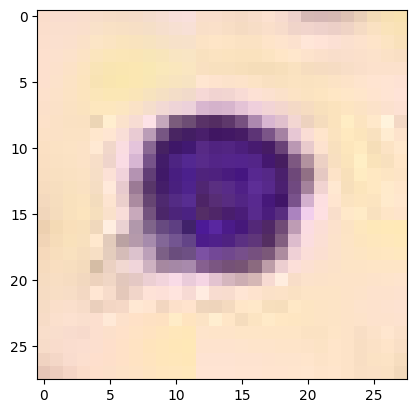

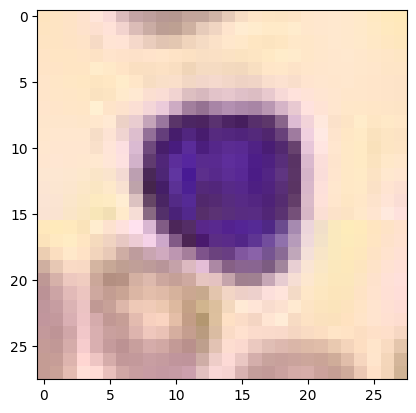

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [9]:
img = X_trainrs
for i in img[-2:]:
    plt.imshow(i)
    plt.show()
print(y_train[-2:])

# CNN

In [22]:
CNN = Sequential()
CNN.add(Convolution2D(32, kernel_size = 3, activation='relu', input_shape=(28, 28, 3), padding='same'))
CNN.add(MaxPooling2D((2, 2), strides=2))
CNN.add(Convolution2D(64, kernel_size = 3, activation='relu', padding='same'))
CNN.add(MaxPooling2D((2, 2), strides=2))
CNN.add(Convolution2D(64, kernel_size = 7, activation='relu', padding='same'))
CNN.add(MaxPooling2D((2, 2), strides=2))
CNN.add(Flatten())
CNN.add(Dense(128, activation='relu'))
CNN.add(Dense(64, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(6, activation='softmax'))

# Fit

In [25]:
CNN.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
Early_callback = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)    
hist = CNN.fit(x=X_trainrs, y=y_train, epochs=100, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=1000, callbacks=[Early_callback])
K.clear_session()

Epoch 1/100
83/83 - 12s - loss: 1.0978 - accuracy: 0.4860 - val_loss: 0.7479 - val_accuracy: 0.6102 - 12s/epoch - 141ms/step
Epoch 2/100
83/83 - 10s - loss: 0.6597 - accuracy: 0.7084 - val_loss: 0.8347 - val_accuracy: 0.5567 - 10s/epoch - 119ms/step
Epoch 3/100
83/83 - 10s - loss: 0.5381 - accuracy: 0.7732 - val_loss: 0.6128 - val_accuracy: 0.6914 - 10s/epoch - 117ms/step
Epoch 4/100
83/83 - 10s - loss: 0.4577 - accuracy: 0.8109 - val_loss: 0.5655 - val_accuracy: 0.7172 - 10s/epoch - 118ms/step
Epoch 5/100
83/83 - 10s - loss: 0.4141 - accuracy: 0.8312 - val_loss: 0.5533 - val_accuracy: 0.7184 - 10s/epoch - 118ms/step
Epoch 6/100
83/83 - 10s - loss: 0.3635 - accuracy: 0.8529 - val_loss: 0.4998 - val_accuracy: 0.7190 - 10s/epoch - 118ms/step
Epoch 7/100
83/83 - 10s - loss: 0.3394 - accuracy: 0.8618 - val_loss: 0.5010 - val_accuracy: 0.7249 - 10s/epoch - 118ms/step
Epoch 8/100
83/83 - 10s - loss: 0.3083 - accuracy: 0.8743 - val_loss: 0.4348 - val_accuracy: 0.7889 - 10s/epoch - 118ms/step


# Gráficos e resultados

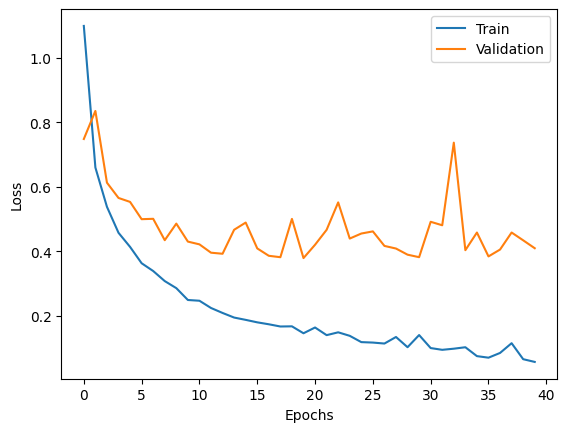

In [27]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [30]:
y_pred = CNN.predict(X_testrs, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
CNN.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("Balanced ACC ->", balanced_accuracy_score(y_comp, y_pred))
cm = confusion_matrix(y_comp, y_pred)
print(cm)

67/67 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.8420
Balanced ACC -> 0.8826787964529043
[[807 254  12   0   0   0]
 [ 23 153   1   0   0   1]
 [  3   0  20   0   0   0]
 [  0   0   0 451   6   4]
 [  0   0   0  14 180   4]
 [  0   0   0  11   3 179]]


In [31]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        counter+=1
counter

336

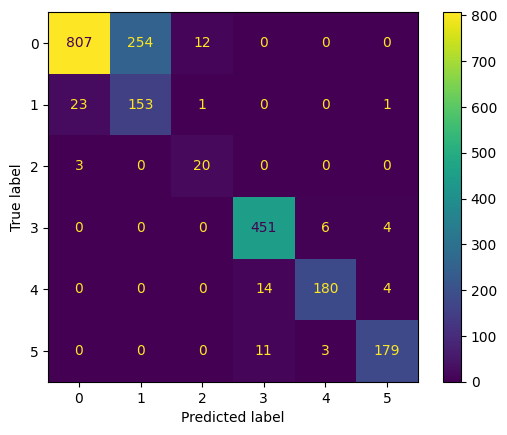

In [32]:
cm = confusion_matrix(y_comp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
disp.plot()
plt.show()


# Valores finais a prever

In [33]:
X_testfinal = np.load("Dados\Xtest_Classification2.npy")
X_testfinal = X_testfinal.astype('float32')/255.0
X_testfinal = X_testfinal.reshape(-1, 28,28,3)  
y_final = CNN.predict(X_testfinal, verbose=0)
y_final = np.argmax(y_final, axis=1)
np.save("Dados/yfinal_Classification2.npy", y_final)


In [36]:
count = np.zeros(6)
for i in y_final:
    count[i]+=1
count

array([1045.,  510.,   37.,  603.,  214.,  249.])